In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


In [4]:
df1 = pd.read_csv('tests.cs.csv')
df2= pd.read_csv('train.csv')
df3 = pd.read_csv('gender_submission.csv')

# Combine datasets if not already done
df_combined = pd.concat([df1, df2])
df_combined = pd.merge(df_combined, df3, on='PassengerId', how='left')


In [5]:
# Check for missing values
missing_values = df_combined.isnull().sum()
print(missing_values)
df_combined['Age'].fillna(df_combined['Age'].median(), inplace=True)
df_combined['Embarked'].fillna(df_combined['Embarked'].mode()[0], inplace=True)
df_combined.drop(columns=['Cabin'], inplace=True)


PassengerId       0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
Survived_x      418
Survived_y      891
dtype: int64


In [6]:

df_combined['Survived_y'] = df_combined['Survived_y'].fillna(0).astype(int)
df_combined['Survived_y'] = df_combined['Survived_y'].astype(int)
df_combined['Pclass'] = df_combined['Pclass'].astype(int)
duplicates = df_combined.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")
df_combined.drop_duplicates(inplace=True)



Number of duplicate rows: 0


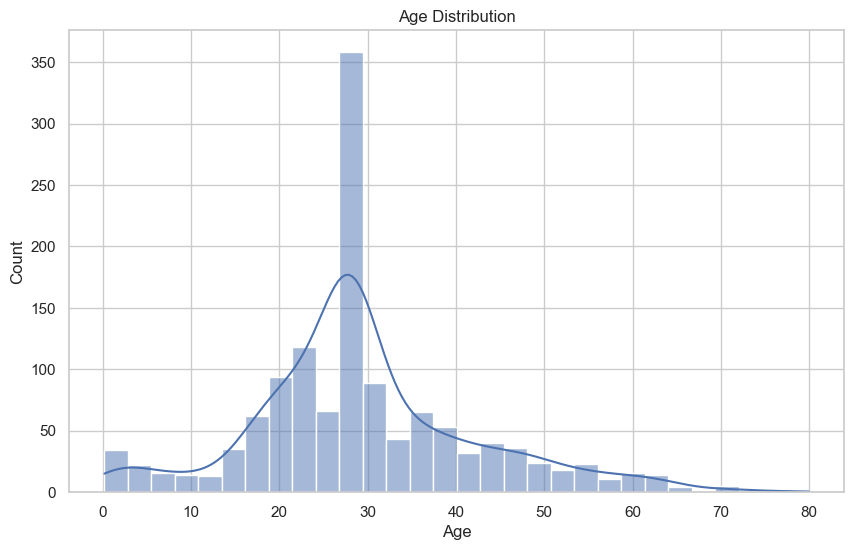

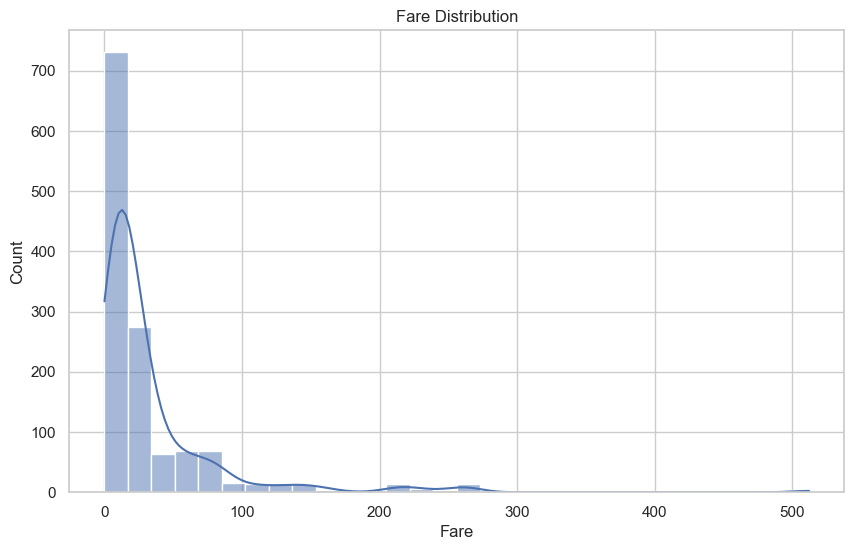

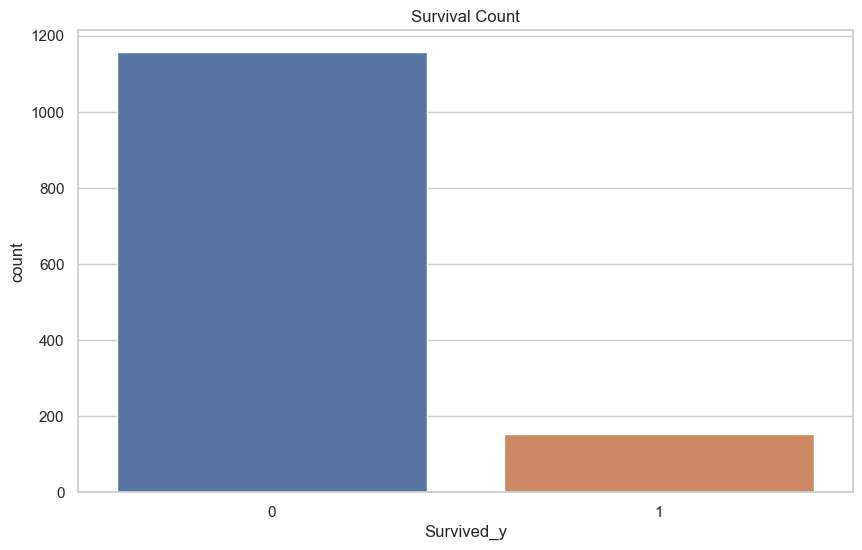

In [7]:
# Distribution of Age
plt.figure(figsize=(10, 6))
sns.histplot(df_combined['Age'], kde=True, bins=30)
plt.title('Age Distribution')
plt.show()

# Distribution of Fare
plt.figure(figsize=(10, 6))
sns.histplot(df_combined['Fare'], kde=True, bins=30)
plt.title('Fare Distribution')
plt.show()

# Count plot of Survived
plt.figure(figsize=(10, 6))
sns.countplot(x='Survived_y', data=df_combined)
plt.title('Survival Count')
plt.show()


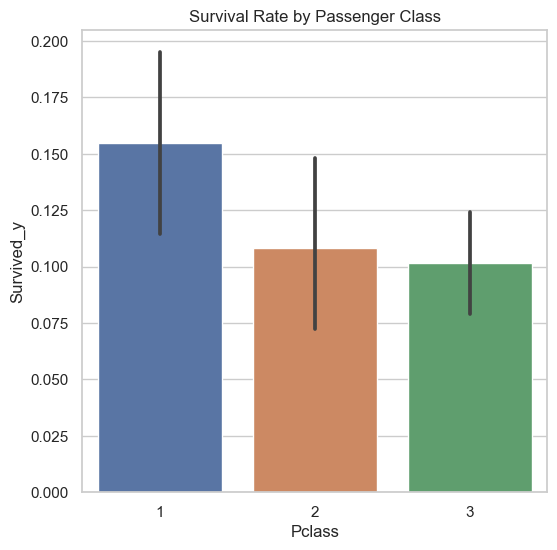

In [9]:
# Survival rate by passenger class
plt.figure(figsize=(6, 6))
sns.barplot(x='Pclass', y='Survived_y', data=df_combined)
plt.title('Survival Rate by Passenger Class')
plt.show()



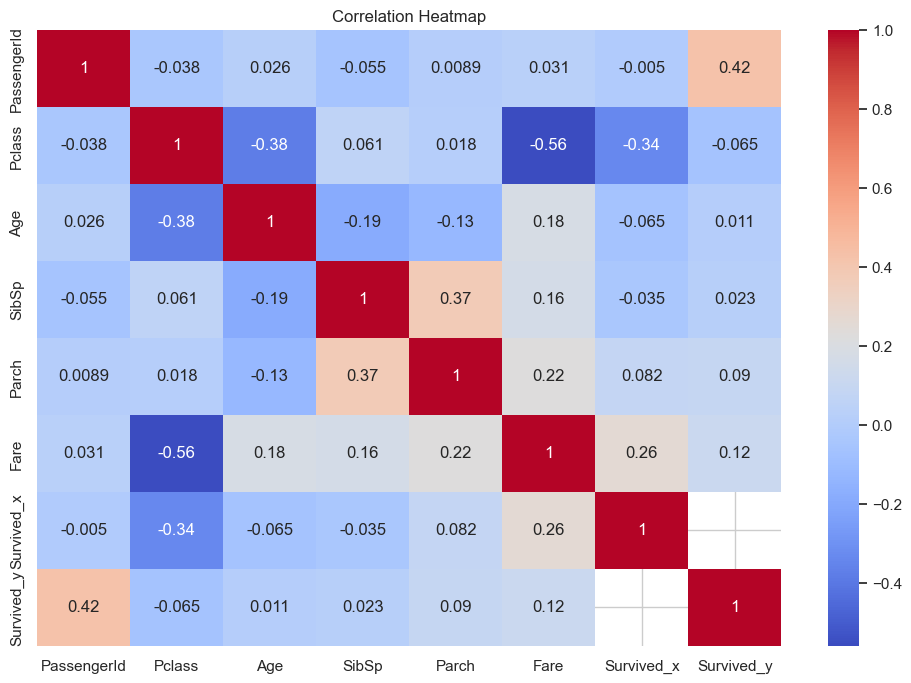

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_df = df_combined.select_dtypes(include=[float, int])

# Heatmap of correlations
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()
